<a href="https://colab.research.google.com/github/kuakua5269/ML_DL/blob/main/classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

sklearn.datasets下載資料：[iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html#sklearn.datasets.load_iris)

In [64]:
from sklearn.datasets import load_iris
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

整理資料都使用 [pandas](https://pandas.pydata.org/docs/reference/index.html#api)

In [65]:
import pandas as pd
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['ans'] = iris['target'] # 增加target這一行
df.to_csv('iris.csv', encoding='utf-8', index=False) # 輸出成csv檔
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


先觀察特徵的相關係數：PW與PL跟ANS相關性最高。

In [66]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
sepal length (cm),1.000000,-0.117570,0.871754,0.817941,0.782561
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal length (cm),0.871754,-0.428440,1.000000,0.962865,0.949035
petal width (cm),0.817941,-0.366126,0.962865,1.000000,0.956547
ans,0.782561,-0.426658,0.949035,0.956547,1.000000


利用[seaborn](https://seaborn.pydata.org/api.html)畫出熱度圖

[IPython](https://ipython.readthedocs.io/en/stable/interactive/plotting.html)
[heatmap()](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)
[colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html)



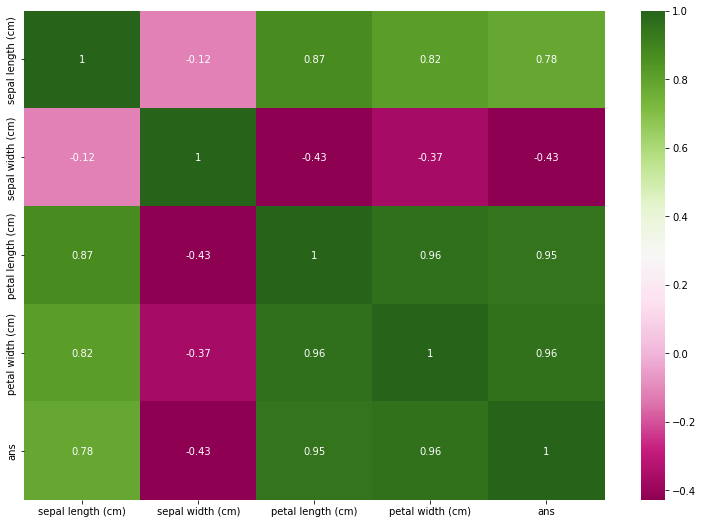

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
# 參考IPython，有圖就顯示出來。
%matplotlib inline 
plt.figure(figsize=(13, 9)) # 改圖的寬高尺寸
sns.heatmap(df.astype('float').corr(), cmap='PiYG', annot=True) # astype()一定要改做，先改成浮點數！

150筆資料是代表x與y都各有150筆！
150筆資料 這樣的資料量足夠嗎？

In [68]:
# 理解練習.drop()
test = pd.DataFrame([
    [1,2,3],
    [4,5,6]
], columns=['a','b','c'], index=['a','b'])
test.drop('b', axis=1)

,a,c
a,1,3
b,4,6


In [69]:
# 理解練習train_test_split()
from sklearn.model_selection import train_test_split
train_test_split([1,2,3,4], [5,6,7,8], [9,10,11,12], test_size=0.25)

[[4, 2, 1], [3], [8, 6, 5], [7], [12, 10, 9], [11]]

把資料分割成**訓練資料**與**測試資料** -> 90%, 10%

In [70]:
import numpy as np
x = np.array(df.drop(['ans'], axis=1))
y = np.array(df['ans'])

In [71]:
from sklearn.model_selection import train_test_split
# 90%x, 10%x, 90%y, 10%y <- 對照下列變數
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.1)

[決策樹分類器](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontree#sklearn-tree-decisiontreeclassifier) -> 把訓練資料丟給演算法學習(fit)

In [72]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2)  # 調整max_depth防止過擬合
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

將訓練結果繪畫出樹圖
[.plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html?highlight=plot_tree#sklearn-tree-plot-tree)
[.export_graphviz](https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html?highlight=export_graphviz#sklearn-tree-export-graphviz)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.665\nsamples = 135\nvalue = [47, 47, 41]\nclass = setosa'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]\nclass = setosa'),
 Text(0.6, 0.5, 'petal length (cm) <= 5.05\ngini = 0.498\nsamples = 88\nvalue = [0, 47, 41]\nclass = versicolor'),
 Text(0.4, 0.16666666666666666, 'gini = 0.177\nsamples = 51\nvalue = [0, 46, 5]\nclass = versicolor'),
 Text(0.8, 0.16666666666666666, 'gini = 0.053\nsamples = 37\nvalue = [0, 1, 36]\nclass = virginica')]

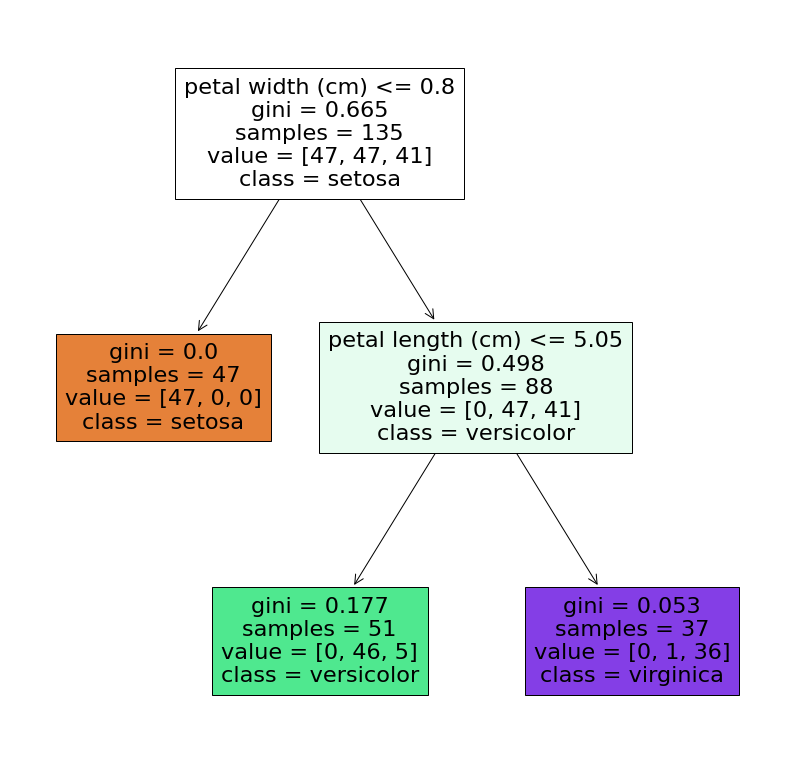

In [73]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(14,14))
plot_tree(clf, 
          feature_names=iris['feature_names'], 
          class_names=iris['target_names'],
          filled=True)

In [74]:
# 法二
# import matplotlib.pyplot as plt
# from sklearn.tree import export_graphviz
# import graphviz
# g = plot_tree(clf,
#               out_file=None,
#               feature_names=iris['feature_names'],
#               class_names=None,
#               filled=True)
# graph = graphviz.Source(g)
# graph

測試模型表現得如何 -> [.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn-metrics-accuracy-score)

[衡量好壞：metrics](https://scikit-learn.org/stable/modules/classes.html?highlight=metrics#classification-metrics)

In [75]:
pre = clf.predict(x_test)
print('預測結果：', list(pre))
print('真正標籤：', list(y_test))

預測結果： [2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 0, 2, 0, 2, 0]
真正標籤： [2, 2, 2, 2, 1, 1, 2, 1, 2, 2, 0, 2, 0, 2, 0]


In [76]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pre)

0.7333333333333333

查看預測錯誤的部分 -> [.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix)

In [77]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2
0,3,0,0
1,0,3,0
2,0,4,5
